# INTRODUCTION TO DATA SCIENCE
## Final Projects - House Price Prediction - 21KDL
## Nhóm: 5

| MSSV     	| Tên                  	| Tỷ lệ đóng góp 	| Ghi chú     	|
|----------	|----------------------	|----------------	|-------------	|
| 21280064 	| Lê Chơn Minh Đạt     	| 33.33%               | Nhóm trưởng 	|
| 21280100 	| Nguyễn Thị Bích Ngọc 	| 33.33%               |             	|
| 21280102 	| Đoàn Thị Mẫn Nhi     	| 33.33%               |             	|

## I. Quá trình thực hiện

### 1. Tìm hiểu khái quát về đề tài
* Mục tiêu: Xây dựng mô hình dự đoán giá nhà
* Tiến trình cơ bản: collect data -> preprocess data -> explore data -> build models -> assess results
* Phạm vi dữ liệu: dữ liệu về giá nhà và các thông tin liên quan về các ngôi nhà được đăng bán trên trang web https://batdongsan.vn/ban-nha


### 2. Thu thập dữ liệu
* Web scraping sử dụng BeautifulSoup để lấy thông tin về giá nhà, loại nhà, địa chỉ, diện tích, số tầng, số phòng ngủ và đường dẫn đến mỗi căn nhà (dùng cho việc kiểm tra)
* Lấy toàn bộ dữ liệu từ web tại thời điểm nhất định (hơn 9000 căn nhà)
* Thu thập đường dẫn đến các trang (bao gồm 483 trang, mỗi trang 20 căn nhà)
* Ở mỗi trang, thu thập đường dẫn đến mỗi căn nhà
* Thử nghiệm lấy dữ liệu của một căn nhà cụ thể, một số thông tin sẽ được lấy trực tiếp dựa trên cấu trúc của file html, một số thông tin sẽ được lấy từ phần mô tả do người bán nhập vào sử dụng kĩ thuật regrex (kiểm tra tất cả các trường hợp cần xử lí trong phần regrex).
* Thực hiện thu thập dữ liệu và lưu trữ

### 3. Xử lí dữ liệu
* Loại bỏ dữ liệu trùng lặp: có 1066 dòng dữ liệu trùng lặp bị loại bỏ trên tổng số 9674 dòng (do người bán có thể đăng tải một thông tin nhiều lần)
* Về giá: kiểm tra tính chính xác của dữ liệu và loại bỏ một số dòng có giá không hợp lí (chỉ lấy giá trong khoảng 100 triệu - 500 tỷ)
* Về diện tích: kiểm tra tính chính xác của dữ liệu và loại bỏ một số dòng có giá không hợp lí (chỉ lấy những căn nhà có diện tích trong khoảng 10m2 - 20000m2)
* Về số tầng và số phòng ngủ: áp dụng thuật toán KNN để điền vào các giá trị thiếu. 
* Về loại nhà và địa chỉ: sử dụng target encoding cho địa chỉ,loại nhà để chuyển đổi sang kiểu dữ liệu số
* Chia 90% dữ liệu cho tập train và 10% cho tập test. Tập train được sử dụng để huấn luyện mô hình, tức là mô hình sẽ học từ các mẫu dữ liệu trong tập này còn tập test được sử dụng để đánh giá hiệu suất của mô hình đã được huấn luyện. Mô hình sẽ được áp dụng vào tập test để đưa ra dự đoán và sau đó so sánh kết quả dự đoán với giá trị thực tế trong tập test.

#### GIẢI THÍCH VỀ MÔ HÌNH KNN:
* Để giải quyết vấn đề Missing Data, một cách hiệu quả là sử dụng một mô hình để dự đoán giá trị cho Missing Data đó, dựa vào những giá trị tồn tại trong tập dữ liệu. KNN là thuật toán học máy có giám sát, đơn giản và dễ triển khai, áp dụng được cho cả bài toán phân loại và hồi quy. Sau khi tìm hiểu các phương pháp khác nhau để xử lí missing values, nhóm đã áp dụng mô hình KNN như một bài toán regression cho những điểm dữ liệu thiếu.
* Trước khi áp dụng mô hình, nhóm đã có quá trình kiểm thử liệu mô hình KNN có phù hợp cho bài toán hiện tại không bằng cách thử nghiệm trên bộ dữ liệu đầy đủ mà nhóm đã thu thập và trích lọc ra, sau đó xử lí để có được bộ dữ liệu với một số điểm dữ liệu thiếu ở hai features 'num_floors' và 'bedrooms', áp dụng mô hình KNN để điền vào các điểm dữ liệu thiếu này và so sánh với dữ liệu ban đầu. Kết quả được nhóm đánh giá là mô hình KNN xử lí missing values cho trường hợp này khá hiệu quả.
* Thuật toán KNN cho rằng những dữ liệu tương tự nhau sẽ tồn tại gần nhau trong một không gian, từ đó công việc của chúng ta là sẽ tìm k điểm gần với dữ liệu cần kiểm tra nhất. Việc tìm khoảng cách giữa 2 điểm cũng có nhiều công thức có thể sử dụng, tùy trường hợp mà chúng ta lựa chọn cho phù hợp.
* Sử dụng lớp KNNImputer từ thư viện Scikit-learn
* Một Instance của KNNImputer có 3 tham số truyền vào cần quan tâm: số lượng mẫu dữ liệu lân cận (n_neighbors); loại khoảng cách (metric): mặc định là ‘nan_euclidean’, tức là Euclidean nhưng bỏ qua các Missing Data; trọng số (weight): sử dụng trọng số giữa các mẫu dữ liệu lân cận khi tính khoảng cách, giá trị mặc định là ‘uniform’, ngoài ra có thể sử dụng giá trị ‘distance’, tức là mẫu dữ liệu nào càng gần mẫu dữ liệu cần dự đoán thì trọng số càng cao.
* metric: lựa chọn loại khoảng cách mặc định đó là khoảng cách Euclid (l2 norm): <br>
$ d(\mathbf{a}, \mathbf{b}) = \|\mathbf{a} - \mathbf{b}\|_2 = \sqrt{\sum_{i=1}^{n} (a_i - b_i)^2}$ <br>
* weight: lựa chọn trọng số mặc định là ‘uniform’
* n_neighbors: tối ưu k bằng cách tối ưu sai số (RMSE) cho mô hình hồi qui thử nghiệm trên các bộ dữ liệu được fill missing với các giá trị k khác nhau

### 4. Khám phá dữ liệu
* Đánh giá độ tương quan: sử dụng ma trận tương quan và biểu đồ heatmap để tính độ tương quan giữa các features với nhau và giữa features với target
* Vẽ biểu đồ thể hiện phân phối của các features


### 5. Xây dựng các mô hình

Mô tả dữ liệu:
- price: là biến target, giá nhà.
- city_encoder: là feature kiểu catalog của thành phố được mã hoá dựa trên target price
- city_encoder: là feature kiểu catalog của thành phố được mã hoá dựa trên target price


#### i. Linear Regression
-  Trên toàn bộ dữ liệu : Linear Regression dựa vào các feature 'city','area','num_floors','bedrooms','houseTypes'
- Đối với các dữ liệu có tỉnh ở TP.HCM thì Linear Regression dựa vào các feature 'district','area','num_floors','bedrooms','houseTypes'
- Với x = [x₁, x₂,.. xn]ᵀ là một vector cột chứa thông tin đầu vào, ta có thể mô hình quan hệ giữa đầu ra và đầu vào bằng một hàm tuyến tính đơn giản:
$$
y ≈ ŷ = f(x) = w₁x₁ + w₂x₂ + ... + wₙxₙ = Xᵀw
$$ 
 - trong đó:
    - w = [w₁, w₂, ..wn]ᵀ là vector hệ số (hoặc trọng số – weight vector) cần tìm
    - y là một số vô hướng đầu ra.

- Hàm Loss của Linear Regression có dạng :
$$
L(w) = \frac{1}{N} \| X^Tw - y \|_2^2
$$
- Đánh giá hiệu suất của mô hình dựa vào MSE, Variance
- MSE (Mean Squared Error): Đây là một phép đo đánh giá hiệu suất của mô hình dự đoán. MSE tính toán tổng trung bình của bình phương sai giữa giá trị dự đoán và giá trị thực tế. Trong trường hợp Linear Regression, MSE thể hiện mức độ chính xác của mô hình trong việc dự đoán giá trị giá nhà. Giá trị MSE càng thấp thì mô hình dự đoán càng chính xác.

$$
MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$

- Variance: Variance đo lường mức độ biến động của các dự đoán từ mô hình. Một variance cao có xu hướng quá tương thích với dữ liệu huấn luyện và không thể tổng quát hóa tốt cho dữ liệu mới.


$$
Var(X) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$


Trong bài toán Linear Regression, mục tiêu là tìm một mô hình có MSE thấp, bias thấp và variance ổn định. Điều này đồng nghĩa với việc tìm một mô hình có khả năng dự đoán chính xác giá trị giá nhà mà không bị sai lệch quá lớn và không bị quá phụ thuộc vào dữ liệu huấn luyện.

#### ii. Ridge Regression
-  Trên toàn bộ dữ liệu : Ridge Regression dựa vào các feature 'city','area','num_floors','bedrooms','houseTypes'
- Đối với các dữ liệu có tỉnh ở TP.HCM thì Ridge Regression dựa vào các feature 'district','area','num_floors','bedrooms','houseTypes'
- Hàm mất mát trong hồi qui Ridge sẽ có sự thay đổi so với hồi qui tuyến tính đó là thành phần điều chuẩn (regularization term) được cộng thêm vào hàm mất mát như sau:
$$
L(w) = \frac{1}{N} \| X^Tw - y \|_2^2 + α⋅\|w\|_2^2
$$
Với  α⋅||w||₂² là *thành phần điều chuẩn*
- MSE (Mean Squared Error): MSE đo lường độ lớn của sai số bình phương trung bình giữa giá trị dự đoán và giá trị thực tế trên tập dữ liệu. Cả Linear Regression và Ridge Regression đều sử dụng MSE để đánh giá hiệu suất của mô hình. Tuy nhiên, Ridge Regression cũng bao gồm thành phần điều chuẩn (regularization term) vào MSE để kiểm soát overfitting.

- Variance: Variance đo lường sự biến đổi trung bình của mô hình dự đoán trên các tập dữ liệu khác nhau. Ridge Regression có thể giảm variance so với Linear Regression bằng cách áp dụng thành phần điều chuẩn. Điều này giúp mô hình Ridge Regression ít phụ thuộc hơn vào dữ liệu huấn luyện và có khả năng tổng quát hóa tốt hơn cho dữ liệu mới.

Tóm lại, MSE, bias và variance trong Ridge Regression và Linear Regression có một số sự khác biệt do sự áp dụng thành phần điều chuẩn trong Ridge Regression để cải thiện hiệu suất và khả năng tổng quát hóa của mô hình.

#### iii. Lasso Regression
-  Trên toàn bộ dữ liệu : Lasso Regression dựa vào các feature 'city','area','num_floors','bedrooms','houseTypes'
- Đối với các dữ liệu có tỉnh ở TP.HCM thì Lasso Regression dựa vào các feature 'district','area','num_floors','bedrooms','houseTypes'
- Trong hồi qui Lasso, thay vì sử dụng thành phần điều chuẩn là norm chuẩn bậc hai thì chúng ta sử dụng norm chuẩn bậc 1 :
$$
L(w) = \frac{1}{N} \| X^Tw - y \|_2^2 + α⋅\|w\|_1
$$
- MSE (Mean Squared Error): Cả Lasso Regression và Ridge Regression đều cố gắng tối thiểu hóa MSE để có được dự đoán chính xác. MSE vẫn là một phép đo phổ biến và được sử dụng để so sánh hiệu suất giữa các mô hình.

- Variance: Ridge Regression giúp giảm variance hơn so với Lasso Regression. Lý do là Ridge Regression sử dụng phương pháp điều chuẩn L2 regularization, làm giảm tác động của các biến không quan trọng một cách liên tục, nhưng không đưa chúng về 0 hoàn toàn. Điều này giúp mô hình có sự ổn định hơn và tránh overfitting.

#### iv.Neutral - Network

- Layer đầu tiên là input layer, các layer ở giữa được gọi là hidden layer, layer cuối cùng được gọi là output layer. Các hình tròn được gọi là node.

- Mỗi mô hình luôn có 1 input layer, 1 output layer, có thể có hoặc không các hidden layer. Tổng số layer trong mô hình được quy ước là số layer – 1 (Không tính input layer).

- Mỗi node trong hidden layer và output layer : 
    + Liên kết với tất cả các node ở layer trước đó với các hệ số w riêng. 
    + Mỗi node có 1 hệ số bias b riêng. 
    + Diễn ra 2 bước: tính tổng linear và áp dụng activation function.

##### a. Simple DNN
- Xây dựng mạng DNN với 5 hidden layers (Dense), 1 input layer và 1 output layer
- Optimizer : Adam, Batch_size = 128, epochs = 10000


##### b. Encoder - Decoder
- Encoder với 4 hidden layer
- Dncoder với 4 hidden layer

Kết quả:
Các mô hình Machine Learning cho MAE và MAPE khá tốt. Các mô hình DL cho kết quả tốt hơn ở MSE

|   | SVM  |  R-FORREST |  DNN  | EN-DECODER   | LinearRegession   |
|---|---|---|---|---|---|
|  MAPE |  0.4752 | 0.4765  | 0.5797  |  0.5590 |  0.7641 |
| MSE  | 29.4931  |  28.4715 | 29.0017  |  28.7978 |  33.9813 |
| MAE  | 2.4311  |  2.5272 | 2.6705  | 2.6021  |  3.3615 |
| VAR  |  0.3316 | 0.3437  |  0.3321 |  0.3367 |  0.2174 |


## II. Các vấn đề gặp phải
* Một số thông tin về căn nhà được lấy từ phần mô tả do người bán nhập vào, do đó quá trình thu thập các thông tin này cần xử lí bao quát tất cả các trường hợp có thể xảy ra (vd: tỷ, tỉ, ty, ti, TY, T, tỏi, ...)
* Một số thông tin người bán nhập sai (vd: 1000 tỷ), nhập nhiều giá trị khác nhau cho cùng một thông tin
* Khó xác định được phương pháp phù hợp để xử lí dữ liệu thiếu và chuyển đổi dữ liệu phân loại



## III. Tổng kết
Trong dự án này, nhóm đã tiến hành nghiên cứu và xây dựng mô hình dự đoán giá nhà sử dụng nhiều phương pháp khác nhau. Mục tiêu của nhóm là tạo ra một mô hình có khả năng dự đoán chính xác giá trị của các căn nhà dựa trên các thông tin đầu vào như diện tích, số tầng, số phòng, vị trí địa lý, loại nhà.

Nhóm đã tiến hành thu thập dữ liệu từ các nguồn tin cậy và tiền xử lý dữ liệu để chuẩn bị cho quá trình huấn luyện và đánh giá mô hình. Qua đó, cũng đã loại bỏ các giá trị thiếu, mã hóa các biến đầu vào và chia dữ liệu thành tập huấn luyện và tập kiểm tra. Sau đó, nhóm đã áp dụng một loạt các mô hình học máy như Linear Regression, Lasso Regression và Ridge Regression, SVM, Random Forest, DNN, En-Decoder để huấn luyện và dự đoán giá nhà. Nhóm đã đánh giá hiệu suất của mỗi mô hình bằng các độ đo như Mean Squared Error (MSE), bias và variance. Các mô hình Machine Learning cho MAE và MAPE khá tốt. Các mô hình DL cho kết quả tốt hơn ở MSE

Tóm lại, Nghiên cứu này đã đưa ra những kết quả và nhận định quan trọng về khả năng dự đoán giá nhà nhờ sử dụng  phương pháp học máy. Các kết quả thu được có thể hỗ trợ trong việc định giá nhà. Đồng thời, bài báo cáo này cũng đặt nền tảng cho các nghiên cứu tiếp theo về việc cải thiện mô hình và góp phần vào sự phát triển và ứng dụng của lĩnh vực này trong thực tế.


## IV. Tài liệu tham khảo
1. https://www.linkedin.com/advice/0/how-do-you-deal-categorical-features-high-cardinality
2. https://machinelearninginterview.com/topics/machine-learning/target-encoding-for-categorical-features
3. https://betterdatascience.com/impute-missing-data-with-python-and-knn
4. https://www.freecodecamp.org/news/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159
5. https://viblo.asia/p/danh-gia-model-trong-machine-learing-RnB5pAq7KPG
6. https://tiensu.github.io/blog/80_data_prepeation_for_ml_data_cleaning_missing_data_3
7. https://nttuan8.com/bai-3-neural-network/



In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import re
import math
import time
# import folium

# COLLECT DATA

In [ ]:
url = 'https://batdongsan.vn/ban-nha/'
data = requests.get(url)

In [ ]:
soup = BeautifulSoup(data.text, 'lxml')

## Thử nghiệm lấy các thông tin cụ thể từ một trang

In [ ]:
print(soup.prettify)

In [ ]:
datalist = soup.find('div', {'class':'datalist'})
for i in datalist.find_all('div', {'class':'name'}):
    house_temp = requests.get(i.a['href']) # link từng cái nhà

In [ ]:
# url1 = 'https://batdongsan.vn/nha-cau-giay-ngo-nong-o-to-vao-gan-nha-gan-mat-pho-mt-5m-35-ty-r268507'
url1 = 'https://batdongsan.vn/nha-gan-buu-longnga-tu-ben-ca-820tr-r268542'
d = requests.get(url1)
s = BeautifulSoup(d.text, 'lxml')
# lay dia chi + loai nha

In [ ]:
HouseInformations = {"houseTypes":[],"area":[], "num_floors":[],"bedrooms":[], "address":[], "price":[]}

In [ ]:
info = s.find('ul', {'class':'uk-breadcrumb'}).text.strip().replace('\n',',').split(',')
diachi = info[3]+", " +info[2]
loai_nha = info[1]
loai_nha
diachi

In [ ]:
t = s.find('div',{'class':'project-global-object-block-003 information-custom'}).find('strong',{'class':'price'}).text.strip()
z = (re.search(r"(\d+(?:\.\d+)?(?:,\d+)?) tỷ", t) or re.search(r"(\d+(?:\.\d+)?(?:,\d+)?) triệu", t))
print(z.group(1))

In [ ]:
s.find('div',{'class':'content'})

In [ ]:
a = s.find('div',{'class':'project-global-object-block-003 information-custom'}).text.strip() + s.find('div',{'class':'content'}).text.strip().replace('\n','')
a = a.replace("\r"," ")
a = a.replace("\n"," ")
a = a.replace("\t"," ")
# a = a.replace("\r\n","")
# a = a.replace("\n\t","")
a

In [ ]:
z = (re.search(r"Tầng (\d+)", a) or re.search(r"(\d+) Tầng", a)
            or re.search(r"tầng (\d+)", a) or re.search(r"(\d+) tầng", a)
            or re.search(r"TẦNG (\d+)", a) or re.search(r"(\d+) TẦNG", a)
            or re.search(r"tầng(\d+)", a) or re.search(r"(\d+)tầng", a))
    
if z != None:
    print("hehe"+ z.group(1))
else:
    pattern = r"Tầng (\d+)"
    matches = re.findall(pattern, a)
    if matches:
        max_floor = max(matches, key=int)
        print(str(max_floor))
    else:
        print('1')

In [ ]:
pattern = r"Tầng (\d+)"
matches = re.findall(pattern, a)
if matches:
    max_floor = max(matches, key=int)
    result = max_floor
    print(result)  # Output: "Tầng 3"
else:
    print("No match found.")

In [ ]:
# Lấy Giá
a
z = (re.search(r"(\d+(?:\.\d+)?(?:,\d+)?) Tỷ", a) or re.search(r"(\d+(?:\.\d+)?(?:,\d+)?) tỷ", a))
print(z.group(1))
z = (re.search(r"(\d+(?:\.\d+)?(?:,\d+)?) triệu", a ) or re.search(r"(\d+(?:\.\d+)?(?:,\d+)?) tr", a)) # cho nếu nhà giá triệu
print(z.group(1))

In [ ]:
a = s.find('div',{'class':'project-global-object-block-003 information-custom'}).text.strip() + s.find('div',{'class':'content'}).text.strip()
# # print(a)
# dientich = None
# phongngu = None
# # tim dien tich
# z = re.search(r"Diện tích: (\d+) m2", a)
# if z != None:
#     dientich = z.group(1)
# else:
#     dientich = z
# # tim so PN
z = (re.search(r"Phòng ngủ: (\d+) PN", a) or re.search(r"(\d+) PN", a) or re.search(r"(\d+)PN", a))
if z != None:
    phongngu = z.group(1)
else:
    phongngu = z
print(phongngu)

In [ ]:
TTphong = s.find('div',{'class':'project-global-object-block-003 information-custom'}).find('ul',{'class','uk-list'}).text.strip().replace('\n',',')
# for i in TTphong: # chu y thong tin phong co the null
#     print(i)
#     if re.search(r"Diện tích: (\d+) m2", i) != None:
        
#     for pattern in [r"Diện tích: (\d+) m2", r"Phòng ngủ: (\d+) PN", r"Phòng ngủ: (\d+) PN"]:
#         z = re.search(,i)
#     print(z.group(1))
TTphong
z = re.search(r"Diện tíc: (\d+) m2", TTphong)
if z != None:
    dientich = z.group(1)
else:
    dientich = z
z = re.search(r"Phòng ngủ: (\d+) PN", TTphong)
print(dientich)
# dientich = re.search(r"Diện tích: (\d+) m2", TTphong).group(1)
# dientich
# PhongNgu = re.search(r"Phòng ng: (\d+) PN", TTphong).group(1)

In [ ]:
num_pages = soup.find("div", {"class":"desc"})
num_pages.text
matches = re.findall(r'\d', num_pages.text)
totals = ''
if len(matches) > 0:
    for number in matches:
        totals += number
totals = int(totals)
totals
total_items = math.ceil(totals/20)
total_items

In [ ]:
list_floor = []

In [ ]:
pattern = r"(\d+)\s?(?:Tầng|Tang|tang| tang|tang |tầng)"
matches = ""
matches = re.findall(pattern, a, re.IGNORECASE) 
if matches:
    print(matches[0])
else:
    print("1")

In [ ]:
text = "Diện tích: 92.2 m2"

regex_pattern = r"(?<=Diện tích: )(\d+(\.\d+)?)"
matches = re.findall(regex_pattern, text)

if matches:
    x = str(float(matches[0][0]))
    print("Giá trị X:", x)
else:
    print("Không tìm thấy giá trị X trong chuỗi.")

## Hàm lấy data

In [ ]:
def getHouseInformationToDict(HouseInformations: dict, soup: BeautifulSoup, url: str):
    if(soup.find('div',{'class':'project-global-object-block-003 information-custom'}) and soup.find('div',{'class':'content'})):
        text_info=""
        text_info = soup.find('div',{'class':'project-global-object-block-003 information-custom'}).text.strip() + soup.find('div',{'class':'content'}).text.strip().replace('\n','')
        text_info = text_info.replace("\r"," ")
        text_info = text_info.replace("\n"," ")
        text_info = text_info.replace("\t"," ")
        
        #parse houseTypes & address
        info = soup.find('ul', {'class':'uk-breadcrumb'}).text.strip().replace('\n',',').split(',')
        HouseInformations['address'].append(info[3]+", " +info[2])
        HouseInformations['houseTypes'].append(info[1])
        
        
        # parse area
        z = re.findall(r"(?<=Diện tích: )(\d+(\.\d+)?)", text_info) or re.findall(r"DT\s+(\d+(\.\d+)?)", text_info, re.IGNORECASE)
        
        if z:
            HouseInformations['area'].append(z[0][0])
        else:
            HouseInformations['area'].append(np.nan)

        #parse floor & num_bedrooms

        pattern = r"(\d+)\s?(?:Tầng|Tang|tang| tang|tang |tầng)"
        matches = ""
        matches = re.findall(pattern, text_info, re.IGNORECASE)
        # print(text_info)
        # print(matches)
        if matches:
            HouseInformations['num_floors'].append(matches[0])
        else:
            # print("else check")
            pattern = r"Tầng\s+(\d+(?:\s*,\s*\d+)*)\b|\bTầng\s+(\d+)\b"
            matches = re.findall(pattern, text_info, re.IGNORECASE)
            # print("else check: ", matches)
            if matches:
                numbers = []
                for match in matches:
                    if match[0] != '':
                        numbers.extend([int(num) for num in re.findall(r'\d+', match[0])])
                    elif match[1] != '':
                        numbers.append(int(match[1]))
                max_number = max(numbers)
                HouseInformations['num_floors'].append(str(max_number))
            else:
                    # print("Lầu check")
                    # pattern = r'\b(\d+)\b\s*(?:T|lầu)'
                    pattern = r'(?:\D+|\s+)(\d+)\s*(?:T|lầu)\b'
                    matches = re.findall(pattern, text_info)
                    # print("maches", matches)
                    if matches:
                        numbers = [int(match) for match in matches]
                        # print(numbers)
                        # print(matches)
                        HouseInformations['num_floors'].append(str(max(numbers)))
                    else:
                        HouseInformations['num_floors'].append(np.nan)
                

        
        
        z = (re.search(r"Phòng ngủ: (\d+) PN", text_info, re.IGNORECASE) or re.search(r"(\d+) PN", text_info)
            or re.search(r"(\d+)PN", text_info)
            or re.search(r"(\d+) phòng ngủ", text_info, re.IGNORECASE)
            or re.search(r"(\d+)pn", text_info)
            or re.search(r"(\d+) pn", text_info))
        if z != None:
            HouseInformations['bedrooms'].append(z.group(1))
        else:
            HouseInformations['bedrooms'].append(np.nan)
        
        
        # parse price
        price = soup.find('div',{'class':'project-global-object-block-003 information-custom'}).find('strong',{'class':'price'}).text.strip()
        if price == 'Thỏa thuận':
            z = (re.search(r"(\d+(?:\.\d+)?(?:,\d+)?) Tỷ", text_info) or re.search(r"(\d+(?:\.\d+)?(?:,\d+)?) tỷ", text_info))

            if z != None:
                HouseInformations['price'].append(z.group(1))     # TH: Tỷ
            else:
                z = (re.search(r"(\d+(?:\.\d+)?(?:,\d+)?) triệu", text_info) or re.search(r"(\d+(?:\.\d+)?(?:,\d+)?) tr", text_info)) # cho nếu nhà giá triệu
                if z != None:
                    HouseInformations['price'].append(str(float(z.group(1))/1000))
                else:
                    HouseInformations['price'].append(z)
        else:
            z = re.search(r"(\d+(?:\.\d+)?(?:,\d+)?) tỷ", price)
            if z != None:
                if float(z.group(1)) > 1000 and float(z.group(1)) < 10000:
                    HouseInformations['price'].append(str(float(z.group(1))/1000))
                elif float(z.group(1)) > 100000:
                    HouseInformations['price'].append(str(float(z.group(1))/1000000))
                else:
                    HouseInformations['price'].append(z.group(1))
            else:
                z = re.search(r"(\d+(?:\.\d+)?(?:,\d+)?) triệu", price)
                if z != None:
                    if (float(z.group(1)) < 100):
                        HouseInformations['price'].append(z.group(1))
                    else:
                        HouseInformations['price'].append(str(float(z.group(1))/1000))
                else:
                    HouseInformations['price'].append(z)
        HouseInformations['url'].append(url)
    else:
        pass

## Tiến hành lấy data

In [ ]:
soup_temp = soup
url_pages = 'https://batdongsan.vn/ban-nha/'
HouseInformations = {"houseTypes":[],"area":[], "num_floors":[],"bedrooms":[], "address":[], "price":[], 'url':[]}
for i in range(2, total_items+1): #start from 'https://batdongsan.vn/ban-nha/' after that to /p2
    print(i)
    data_list = soup_temp.find('div', {'class':'datalist'})
    for item in data_list.find_all('div', {'class':'name'}):
        house_html = requests.get(item.a['href']) # link từng cái nhà 
        if house_html:
            house_soup = BeautifulSoup(house_html.text, 'lxml')
            getHouseInformationToDict(HouseInformations, house_soup, item.a['href'])
    print(url_pages +'p%d' %i)
    data_temp = requests.get(url_pages +'p%d' %i) # url_pages +'p%d' %i next page link
    soup_temp = BeautifulSoup(data_temp.text, 'lxml')

In [ ]:
HouseInformations['url']

In [ ]:
HouseInformations['url'].remove('https://batdongsan.vn/-r264105')

In [ ]:
df = pd.DataFrame.from_dict(HouseInformations)

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                'percent_missing': percent_missing})

In [ ]:
missing_value_df

In [ ]:
df.to_csv('housedata_2.csv',  encoding="utf-8")

In [ ]:
df.to_excel('house_data_2.xlsx', sheet_name='House_data')

In [ ]:
df_1 = pd.read_excel('house_data.xlsx', index_col=[0])

In [ ]:
frames = [df_1, df]
final_df = pd.concat(frames)

In [ ]:
final_df.to_excel('final_df_excel.xlsx', index=False)
final_df.to_csv('data/houses/houses_current.csv', index=False)

# PREPROCESS DATA

In [55]:
# dữ liệu thô ban đầu sau khi vừa mới crawl
data = pd.read_csv('data/houses_current.csv')
data.head()
len(data)

9674

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9674 entries, 0 to 9673
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   houseTypes  9674 non-null   object 
 1   area        9497 non-null   float64
 2   num_floors  7706 non-null   float64
 3   bedrooms    7577 non-null   float64
 4   address     9674 non-null   object 
 5   price       9548 non-null   float64
 6   url         9674 non-null   object 
dtypes: float64(4), object(3)
memory usage: 529.2+ KB


REMOVE DUPLICATES

In [57]:
print('Sum of duplicates: ', data.duplicated(subset=['houseTypes', 'area', 'num_floors', 'bedrooms','address','price']).sum())
data = data.drop_duplicates(subset=['houseTypes', 'area', 'num_floors', 'bedrooms','address','price']).copy()
print('After removing duplicates: ', data.duplicated().sum())
print('Length of data then: ', len(data))

Sum of duplicates:  1066
After removing duplicates:  0
Length of data then:  8608


CONVERT OBJECT TO FLOAT64 AND STRING

In [58]:
data = data.astype({'houseTypes':'string','address':'string','url':'string'})

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8608 entries, 0 to 9673
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   houseTypes  8608 non-null   string 
 1   area        8447 non-null   float64
 2   num_floors  6798 non-null   float64
 3   bedrooms    6698 non-null   float64
 4   address     8608 non-null   string 
 5   price       8492 non-null   float64
 6   url         8608 non-null   string 
dtypes: float64(4), string(3)
memory usage: 538.0 KB


In [60]:
for col in data.columns:
    print('Ratio of missing data of ' + str(col) +': ' + str(round(data[col].isna().sum()*100/len(data[col]),3)) + '%')

Ratio of missing data of houseTypes: 0.0%
Ratio of missing data of area: 1.87%
Ratio of missing data of num_floors: 21.027%
Ratio of missing data of bedrooms: 22.189%
Ratio of missing data of address: 0.0%
Ratio of missing data of price: 1.348%
Ratio of missing data of url: 0.0%


In [61]:
data[['district','city']] = data['address'].apply(lambda x: pd.Series(str(x).split(', ')))


In [62]:
data = data.drop(['address'], axis=True)

In [63]:
data.reset_index(inplace=True, drop=True)

In [64]:
data = data[['houseTypes','area','num_floors','bedrooms','district','city','price','url']]

In [65]:
data.head()

,houseTypes,area,num_floors,bedrooms,district,city,price,url
0,Bán Nhà riêng,130.0,3.0,7.0,Quận 12,TP Hồ Chí Minh,9.200,https://batdongsan.vn/ban-biet-thu-san-vuon-qu...
1,Bán Nhà riêng,65.0,NaN,2.0,Ngũ Hành Sơn,Đà Nẵng,2.900,https://batdongsan.vn/29-ty-dien-tich-6580m2-n...
2,Bán Nhà riêng,90.0,5.0,5.0,Hai Bà Trưng,Hà Nội,14.000,https://batdongsan.vn/ban-nha-kim-nguu-phan-lo...
3,Bán Nhà riêng,50.0,5.0,5.0,Quận 3,TP Hồ Chí Minh,0.001,https://batdongsan.vn/quan-3-le-van-sy-5-tang-...
4,Bán Nhà riêng,30.0,1.0,2.0,Gò Vấp,TP Hồ Chí Minh,3.700,https://batdongsan.vn/nha-moi-full-noi-that-hx...


In [66]:
# data.to_csv('data/houses/houses.csv',index=False)
# data.to_excel('data/houses/houses.xlsx',index=False)

## Xử lí giá

In [67]:
data.price.describe()

count     8492.000000
mean       179.531718
std       2044.588083
min          0.000000
25%          3.650000
50%          5.450000
75%          8.500000
max      89440.000000
Name: price, dtype: float64

In [68]:
low_noise_data = data.loc[(data['price'] < 0.1)]
hign_noise_data = data.loc[(data['price'] >= 500)]
null_price_data = data[data['price'].isna()]

/var/folders/_x/886sy6k57y90dfy4fjklx08r0000gn/T/ipykernel_12335/958291345.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_data_1['price'])


<AxesSubplot: xlabel='price', ylabel='Density'>

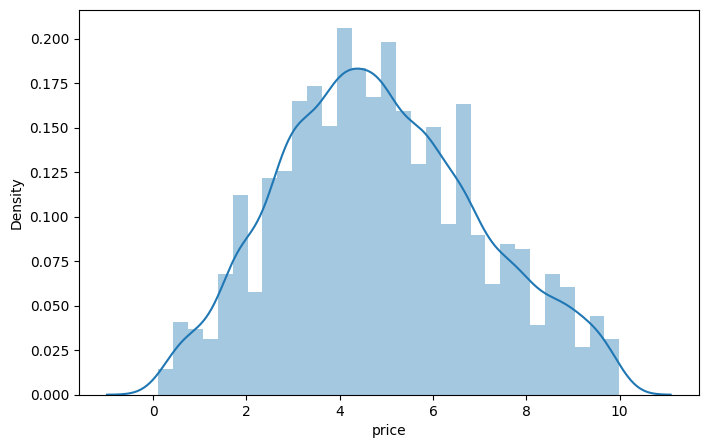

In [69]:
house_data_1 = data.loc[(data['price'] >= 0.1) & (data['price'] < 10)]
fig,ax = plt.subplots(figsize = (8,5))
sns.distplot(house_data_1['price'])

/var/folders/_x/886sy6k57y90dfy4fjklx08r0000gn/T/ipykernel_12335/840156701.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_data_2['price'])


<AxesSubplot: xlabel='price', ylabel='Density'>

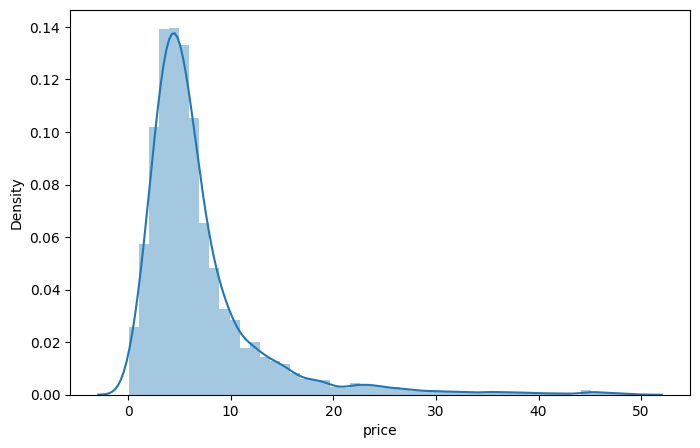

In [70]:
house_data_2 = data.loc[(data['price'] >= 0.1) & (data['price'] < 50)]
fig,ax = plt.subplots(figsize = (8,5))
sns.distplot(house_data_2['price'])

In [71]:
house_data = data.loc[(data['price'] >= 0.1) & (data['price'] < 500)]

/var/folders/_x/886sy6k57y90dfy4fjklx08r0000gn/T/ipykernel_12335/3740483212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_data['price'])


<AxesSubplot: xlabel='price', ylabel='Density'>

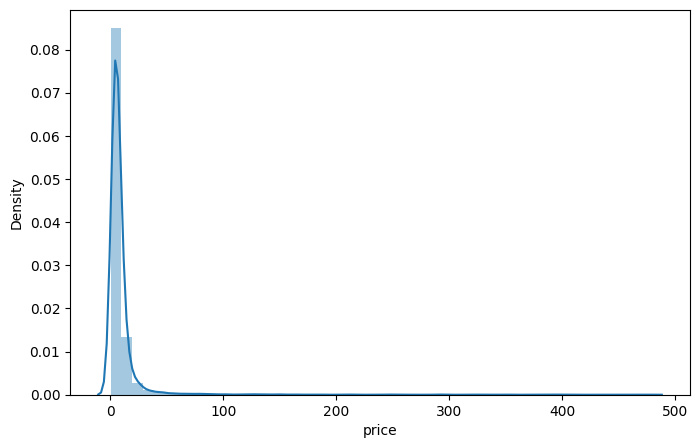

In [72]:
fig,ax = plt.subplots(figsize = (8,5))
sns.distplot(house_data['price'])

## Xử lí area

In [73]:
house_data['area'].isna().sum()

124

In [74]:
house_data['area'].describe()

count      8142.000000
mean         97.477207
std        1148.948237
min           3.000000
25%          43.000000
50%          58.000000
75%          84.000000
max      100103.000000
Name: area, dtype: float64

In [75]:
house_data = house_data.loc[(house_data['area'] >= 10) & (house_data['area'] <= 20000)]

In [76]:
house_data['area'].describe()

count     8096.000000
mean        85.640689
std        303.197151
min         10.000000
25%         44.000000
50%         59.000000
75%         85.000000
max      18264.000000
Name: area, dtype: float64

/var/folders/_x/886sy6k57y90dfy4fjklx08r0000gn/T/ipykernel_12335/255560388.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_data_3['area'])


<AxesSubplot: xlabel='area', ylabel='Density'>

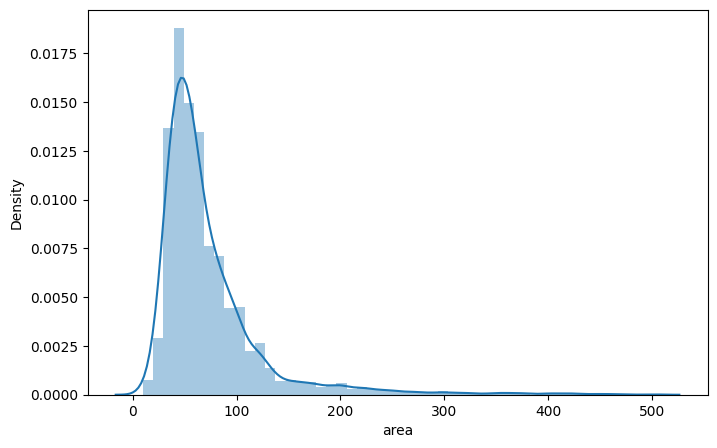

In [77]:
house_data_3 = house_data.loc[(house_data['area'] >=10) & (house_data['area'] <=500)]
fig,ax = plt.subplots(figsize = (8,5))
sns.distplot(house_data_3['area'])

In [78]:
# house_data.to_excel('data/houses/house_data.xlsx', index=False)

## Thử nghiệm KNN cho missing values

In [79]:
not_null_houses = house_data.dropna() # phải lấy house_data lúc còn null (trước khi fill ở phần trên)
not_null_houses.to_excel('data/not_null_houses.xlsx',index=False)

In [80]:
i1 = np.random.choice(a=not_null_houses.index, size=50)
i2 = np.random.choice(a=not_null_houses.index, size=50)
print(i1)
print(i2)

[5943 3849 7109 8316 4182 6833 1149 3039 7787 7530 8379 5634 5955 3817
 6727 8072 5887 8398 2158   49 7971 1714 6538 3990 2703 1615 7416 8045
 6493 1331 3365 5120 1599 2002 2975 1723 4246 3841 3411 7153 3765  251
 1593 3878 6078  338 3112 1339  526 5972]
[5858 5943 3580 2480 6536 8262 3472 2340 6989 5638 3412 5364  662 7167
 8233 4268 3521 7754 2009 7334 7844 1610 8516 2934 1051 7530 3823 5243
  695 2551 5233 4330 1499 2000 4586 5133 2184 2259 2963 7414 8066 8057
 1691 7238 3600 2225 3680 5575 5228 3179]


In [81]:
null_houses = pd.DataFrame({'area':not_null_houses['area'],'num_floors':not_null_houses['num_floors'],'bedrooms':not_null_houses['bedrooms'],'price':not_null_houses['price']})
null_houses.isna().sum()

area          0
num_floors    0
bedrooms      0
price         0
dtype: int64

In [82]:
null_houses.loc[i1, 'num_floors'] = np.nan
null_houses.loc[i2, 'bedrooms'] = np.nan

In [83]:
#null_houses.loc[164]

In [84]:
null_houses.isna().sum()

area           0
num_floors    50
bedrooms      50
price          0
dtype: int64

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer

rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))

In [86]:
def optimize_k(data, target):
    errors = []
    for k in range(1, 20, 2):
        imputer = KNNImputer(n_neighbors=k)
        imputed = imputer.fit_transform(data)
        df_imputed = pd.DataFrame(imputed, columns=data.columns)
        
        X = df_imputed.drop(target, axis=1)
        y = df_imputed[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        error = rmse(y_test, preds)
        errors.append({'K': k, 'RMSE': error})
        
    return errors

In [87]:
k_errors = optimize_k(data=null_houses, target='price')
print(k_errors)

[{'K': 1, 'RMSE': 21.804302832974283}, {'K': 3, 'RMSE': 21.722800285021478}, {'K': 5, 'RMSE': 21.77756354818173}, {'K': 7, 'RMSE': 21.76964535307924}, {'K': 9, 'RMSE': 21.91700081386671}, {'K': 11, 'RMSE': 21.824701633639418}, {'K': 13, 'RMSE': 21.808828299386175}, {'K': 15, 'RMSE': 21.807714508022716}, {'K': 17, 'RMSE': 21.750035243503156}, {'K': 19, 'RMSE': 21.856286536645328}]


In [88]:
imputer_test = KNNImputer(n_neighbors=13)
imputed_test = imputer_test.fit_transform(null_houses)
df_imputed_test = pd.DataFrame(imputed_test, columns=null_houses.columns)

In [89]:
df_imputed_test.isna().sum()
# df_imputed_test.to_excel('data/df_imputed_test.xlsx',index=False)

area          0
num_floors    0
bedrooms      0
price         0
dtype: int64

Note: so sánh not_null_houses.xlsx và df_imputed_test.xlsx

## Xử lý num_floors và bedrooms

In [90]:
house_data.isna().sum()

houseTypes       0
area             0
num_floors    1680
bedrooms      1709
district         0
city             0
price            0
url              0
dtype: int64

In [91]:
house_data.loc[house_data['num_floors'] > 11, 'num_floors'] = None
house_data.isna().sum()

houseTypes       0
area             0
num_floors    1700
bedrooms      1709
district         0
city             0
price            0
url              0
dtype: int64

/var/folders/_x/886sy6k57y90dfy4fjklx08r0000gn/T/ipykernel_12335/4248583683.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_data['num_floors'])


<AxesSubplot: xlabel='num_floors', ylabel='Density'>

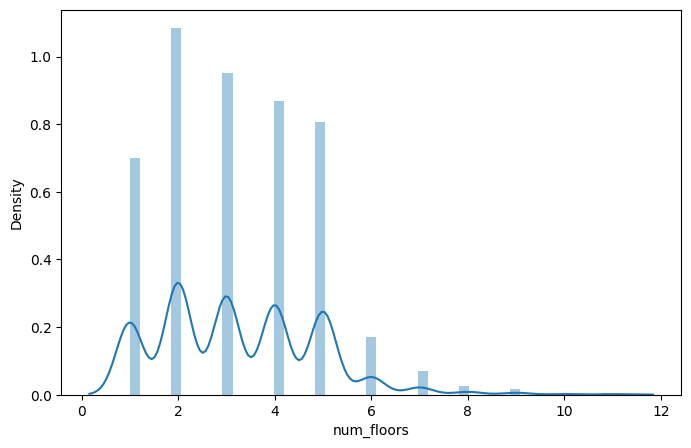

In [92]:
fig,ax = plt.subplots(figsize = (8,5))
sns.distplot(house_data['num_floors'])

/var/folders/_x/886sy6k57y90dfy4fjklx08r0000gn/T/ipykernel_12335/2031751330.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_data['bedrooms'])


<AxesSubplot: xlabel='bedrooms', ylabel='Density'>

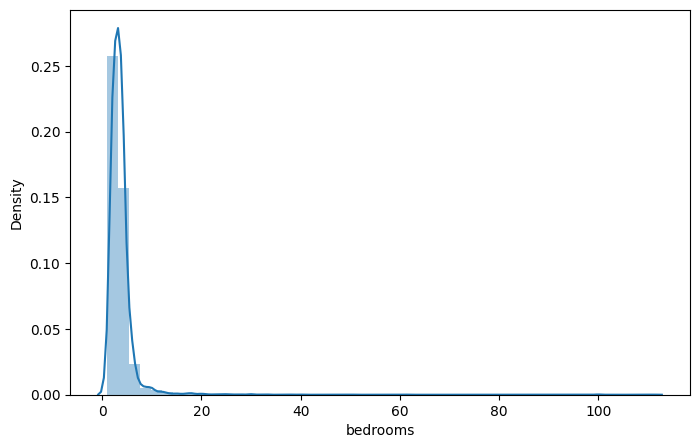

In [93]:
fig,ax = plt.subplots(figsize = (8,5))
sns.distplot(house_data['bedrooms'])

In [94]:
numeric_houses = pd.DataFrame({'area':house_data['area'],'num_floors':house_data['num_floors'],'bedrooms':house_data['bedrooms'],'price':house_data['price']})
numeric_houses.isna().sum()

area             0
num_floors    1700
bedrooms      1709
price            0
dtype: int64

In [95]:
len(numeric_houses)

8096

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer

rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))

In [97]:
def optimize_k(data, target):
    errors = []
    for k in range(1, 20):
        imputer = KNNImputer(n_neighbors=k)
        imputed = imputer.fit_transform(data)
        df_imputed = pd.DataFrame(imputed, columns=data.columns)
        
        X = df_imputed.drop(target, axis=1)
        y = df_imputed[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        error = rmse(y_test, preds)
        errors.append({'K': k, 'RMSE': error})
        
    return errors

In [98]:
test_numeric_house = numeric_houses.copy()
test_numeric_house.isna().sum()

area             0
num_floors    1700
bedrooms      1709
price            0
dtype: int64

In [99]:
k_errors = optimize_k(data=test_numeric_house, target='price')
print(k_errors)

[{'K': 1, 'RMSE': 16.638000250760296}, {'K': 2, 'RMSE': 19.248312391461806}, {'K': 3, 'RMSE': 19.17219307871966}, {'K': 4, 'RMSE': 19.175569189983}, {'K': 5, 'RMSE': 18.610365400330274}, {'K': 6, 'RMSE': 19.41676615080051}, {'K': 7, 'RMSE': 18.277393438042036}, {'K': 8, 'RMSE': 18.807150828368293}, {'K': 9, 'RMSE': 18.0746806680686}, {'K': 10, 'RMSE': 18.573653225677422}, {'K': 11, 'RMSE': 18.662372809986028}, {'K': 12, 'RMSE': 18.07484198976305}, {'K': 13, 'RMSE': 17.31879186755586}, {'K': 14, 'RMSE': 17.780478046280553}, {'K': 15, 'RMSE': 17.77540391656078}, {'K': 16, 'RMSE': 17.5424514291122}, {'K': 17, 'RMSE': 17.472632758403545}, {'K': 18, 'RMSE': 17.66962469527138}, {'K': 19, 'RMSE': 17.485468470272952}]


In [100]:
imputer = KNNImputer(n_neighbors=17)
imputed = imputer.fit_transform(numeric_houses)
df_imputed = pd.DataFrame(imputed, columns=numeric_houses.columns)

In [101]:
df_imputed.isna().sum()

area          0
num_floors    0
bedrooms      0
price         0
dtype: int64

In [102]:
df_imputed['bedrooms'].describe()

count    8096.000000
mean        3.791567
std         3.246014
min         1.000000
25%         2.705882
50%         3.000000
75%         4.000000
max       111.000000
Name: bedrooms, dtype: float64

In [103]:
# numeric_houses.to_excel('numeric_houses.xlsx',index=False)
# df_imputed.to_excel('df_imputed.xlsx',index=False)

In [104]:
house_data = house_data.reset_index()

In [105]:
house_data['new_num_floors'] = df_imputed['num_floors'].round(0)
house_data['new_bedrooms'] = df_imputed['bedrooms'].round(0)

In [106]:
house_data.isna().sum()

index                0
houseTypes           0
area                 0
num_floors        1700
bedrooms          1709
district             0
city                 0
price                0
url                  0
new_num_floors       0
new_bedrooms         0
dtype: int64

In [107]:
house_data.drop(['url','index','num_floors','bedrooms'],axis=1,inplace=True)
house_data = house_data[['houseTypes','area','new_num_floors','new_bedrooms','district','city','price']]

In [108]:
house_data.to_excel('full_houses.xlsx', index=False)
house_data

,houseTypes,area,new_num_floors,new_bedrooms,district,city,price
0,Bán Nhà riêng,130.0,3.0,7.0,Quận 12,TP Hồ Chí Minh,9.20
1,Bán Nhà riêng,65.0,2.0,2.0,Ngũ Hành Sơn,Đà Nẵng,2.90
2,Bán Nhà riêng,90.0,5.0,5.0,Hai Bà Trưng,Hà Nội,14.00
3,Bán Nhà riêng,30.0,1.0,2.0,Gò Vấp,TP Hồ Chí Minh,3.70
4,Bán Nhà riêng,38.0,3.0,3.0,Bình Thạnh,TP Hồ Chí Minh,4.40
...,...,...,...,...,...,...,...
8091,Bán Nhà riêng,61.0,3.0,4.0,Gò Vấp,TP Hồ Chí Minh,9.50
8092,Bán Nhà riêng,64.0,3.0,5.0,Bình Thạnh,TP Hồ Chí Minh,9.50
8093,Bán Nhà riêng,60.0,3.0,3.0,Tân Phú,TP Hồ Chí Minh,5.40
8094,Bán Nhà riêng,90.0,2.0,2.0,Biên Hòa,Đồng Nai,2.85


## Encoding

In [109]:
house_data = pd.read_excel('full_houses.xlsx')

In [110]:
import category_encoders as ce

# encoding city
target_encoder =ce.TargetEncoder() 
new = target_encoder.fit_transform(house_data[['city','district','houseTypes']],house_data['price'])
new = new.rename(columns={'city':'city_encoder','district':'district_encoder','houseTypes':'houseTypes_encoder'})
data_encoded = pd.concat([house_data, new], axis=1)


# Xóa các cột gốc trong biến data
data_encoded.drop(['houseTypes','city','district'], axis=1, inplace=True)


print(data_encoded.head(10))

    area  new_num_floors  new_bedrooms  price  city_encoder  district_encoder  \
0  130.0               3             7    9.2      9.292954          8.661038   
1   65.0               2             2    2.9      7.417350          7.708597   
2   90.0               5             5   14.0     11.089988          8.835714   
3   30.0               1             2    3.7      9.292954          6.731978   
4   38.0               3             3    4.4      9.292954         11.315324   
5   45.0               2             2    3.9      9.292954          7.525423   
6   51.0               6             4   12.7      9.292954          6.731978   
7   50.0               4             4   25.0     11.089988         14.754023   
8  160.0               3             3    4.5      8.617771          8.617771   
9   48.0               5             4    7.4      9.292954          6.731978   

   houseTypes_encoder  
0            7.343849  
1            7.343849  
2            7.343849  
3           

In [111]:
area_lower, area_upper = data_encoded.area.mean() - data_encoded.area.std()*3, data_encoded.area.mean() + data_encoded.area.std()*3
floor_lower, floor_upper = data_encoded.new_num_floors.mean() - data_encoded.new_num_floors.std()*3, data_encoded.new_num_floors.mean() + data_encoded.new_num_floors.std()*3
bedroom_lower, bedroom_upper = data_encoded.new_bedrooms.mean() - data_encoded.new_bedrooms.std()*3, data_encoded.new_bedrooms.mean() + data_encoded.new_bedrooms.std()*3
city_lower, city_upper = data_encoded.city_encoder.mean() - data_encoded.city_encoder.std()*3, data_encoded.city_encoder.mean() + data_encoded.city_encoder.std()*3
district_lower, district_upper = data_encoded.district_encoder.mean() - data_encoded.district_encoder.std()*3, data_encoded.district_encoder.mean() + data_encoded.district_encoder.std()*3
type_lower, type_upper = data_encoded.houseTypes_encoder.mean() - data_encoded.houseTypes_encoder.std()*3, data_encoded.houseTypes_encoder.mean() + data_encoded.houseTypes_encoder.std()*3
price_lower, price_upper = data_encoded.price.mean() - data_encoded.price.std()*3, data_encoded.price.mean() + data_encoded.price.std()*3


In [112]:
clean_data = data_encoded.loc[(data_encoded['area'] >= area_lower) & (data_encoded['area'] <= area_upper)]
clean_data = clean_data.loc[(clean_data['new_num_floors'] >= floor_lower) & (clean_data['new_num_floors'] <= floor_upper)]
clean_data = clean_data.loc[(clean_data['new_bedrooms'] >= bedroom_lower) & (clean_data['new_bedrooms'] <= bedroom_upper)]
clean_data = clean_data.loc[(clean_data['city_encoder'] >= city_lower) & (clean_data['city_encoder'] <= city_upper)]
clean_data = clean_data.loc[(clean_data['district_encoder'] >= district_lower) & (clean_data['district_encoder'] <= district_upper)]
clean_data = clean_data.loc[(clean_data['houseTypes_encoder'] >= type_lower) & (clean_data['houseTypes_encoder'] <= type_upper)]
clean_data = clean_data.loc[(clean_data['price'] >= price_lower) & (clean_data['price'] <= price_upper)]

In [113]:
clean_data.describe()

,area,new_num_floors,new_bedrooms,price,city_encoder,district_encoder,houseTypes_encoder
count,7497.000000,7497.000000,7497.000000,7497.000000,7497.000000,7497.000000,7497.000000
mean,71.332093,3.114179,3.542484,7.117202,9.441714,9.086617,9.111822
std,58.924419,1.391786,1.534759,6.909489,1.372277,2.897918,3.465229
min,10.000000,1.000000,1.000000,0.110000,4.202107,2.926135,6.407138
25%,42.000000,2.000000,3.000000,3.700000,9.292954,7.387305,7.343849
50%,56.000000,3.000000,3.000000,5.350000,9.292954,8.786364,7.343849
75%,80.000000,4.000000,4.000000,7.900000,11.089988,10.744222,7.343849
max,995.000000,7.000000,13.000000,75.000000,11.480157,16.933277,15.706045


In [114]:
clean_data.to_excel('clean_data.xlsx',index=False)

<AxesSubplot: >

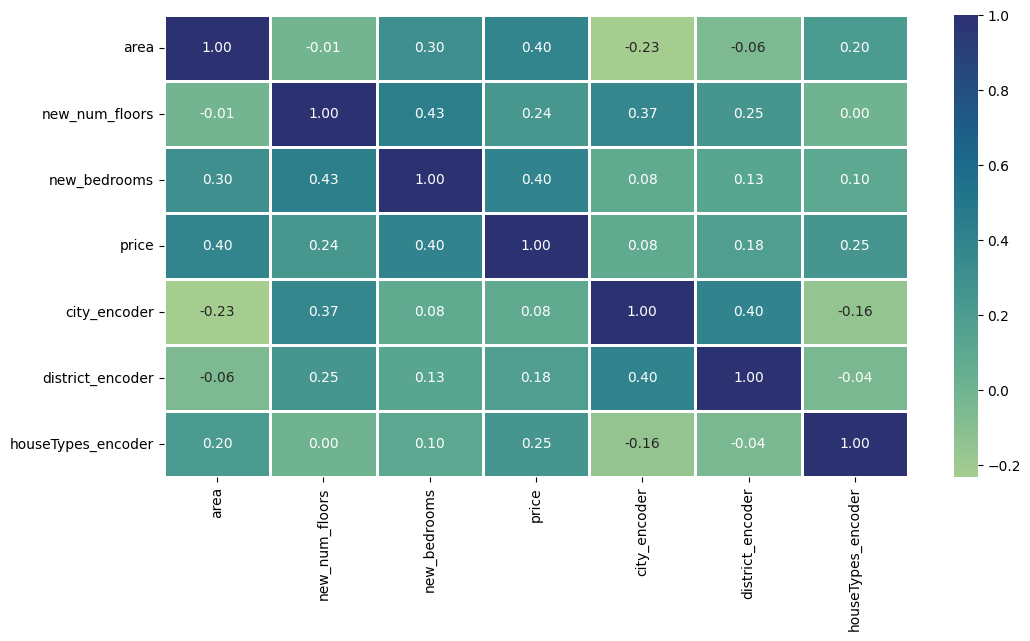

In [115]:
plt.figure(figsize=(12, 6))
sns.heatmap(clean_data.corr(), cmap="crest",fmt = '.2f',linewidths = 2,annot = True)

array([[<AxesSubplot: title={'center': 'area'}>,
        <AxesSubplot: title={'center': 'new_num_floors'}>],
       [<AxesSubplot: title={'center': 'new_bedrooms'}>,
        <AxesSubplot: title={'center': 'city_encoder'}>],
       [<AxesSubplot: title={'center': 'district_encoder'}>,
        <AxesSubplot: title={'center': 'houseTypes_encoder'}>]],
      dtype=object)

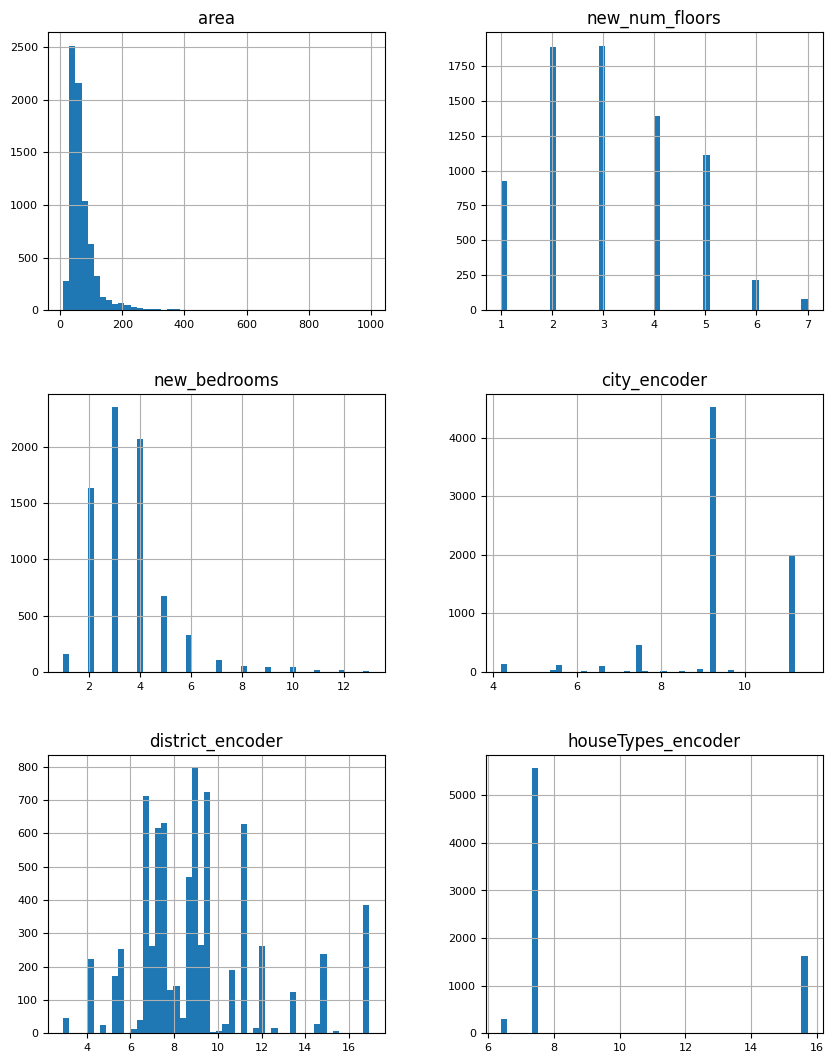

In [116]:
features = clean_data.drop(['price'], axis=True)
features.hist(figsize=(10,13), bins=50, xlabelsize=8, ylabelsize=8)

In [125]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
 
X = clean_data.drop(['price'], axis=1)
Y = clean_data['price']

X = Normalizer().fit_transform(StandardScaler().fit_transform(X.values)) 

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

# MODELS

In [173]:
from sklearn import svm
from sklearn.svm import SVC
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split
from mlxtend.evaluate import bias_variance_decomp
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score,mean_absolute_percentage_error
 


SVM

In [ ]:
model_SVR = svm.SVR()
model_SVR.fit(X_train,y_train)
y_pred = model_SVR.predict(X_test)
 

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print(mean_absolute_percentage_error(y_test, y_pred))
print("MSE: ", mse)
print("MAE: ", mae)
print("variance: ", evs)

RANDOM FOREST

In [171]:

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, y_train)
y_pred = model_RFR.predict(X_test)
 
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print(mean_absolute_percentage_error(y_test, y_pred))
print("MSE: ", mse)
print("MAE: ", mae)
print("variance: ", evs)

0.5065219324917803
MSE:  29.233817991425774
MAE:  2.5551588895071937
variance:  0.32622400712234423


Linear Regression

In [174]:

model_ln = LinearRegression()
model_ln.fit(X_train, y_train)
y_pred = model_ln.predict(X_test)
 
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print(mean_absolute_percentage_error(y_test, y_pred))
print("MSE: ", mse)
print("MAE: ", mae)
print("variance: ", evs)

0.7641324758937985
MSE:  33.981315972225175
MAE:  3.3615104140946643
variance:  0.21740760710808993


In [175]:
model_ls = LassoCV(cv=5)
model_ls.fit(X_train, y_train)
y_pred = model_ls.predict(X_test)
 
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print(mean_absolute_percentage_error(y_test, y_pred))
print("MSE: ", mse)
print("MAE: ", mae)
print("variance: ", evs)

0.7638206211812352
MSE:  33.977088265914595
MAE:  3.3596581431097103
variance:  0.2175049059589822


In [176]:
model_r= RidgeCV(cv=5)
model_r.fit(X_train, y_train)
y_pred = model_r.predict(X_test)
 
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print(mean_absolute_percentage_error(y_test, y_pred))
print("MSE: ", mse)
print("MAE: ", mae)
print("variance: ", evs)

0.7624067591705274
MSE:  33.96190318689808
MAE:  3.3528646121275996
variance:  0.2178530179289362


In [170]:

import keras
from keras_nlp.layers import TransformerEncoder, TransformerDecoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

## Simple ANN

In [158]:
class ModelRNN(keras.Model):
    def __init__(self):
        super().__init__()
        self.dense1 = keras.layers.Dense(128, activation='relu')
        self.dense2 = keras.layers.Dense(128, activation='relu')
        self.dense3 = keras.layers.Dense(128, activation='relu')
        self.dense4 = keras.layers.Dense(128, activation='relu')
        self.dense5 = keras.layers.Dense(128, activation='relu')
        self.dense6 = keras.layers.Dense(1, activation='relu')
        self.model = Sequential([self.dense1, self.dense2, self.dense3, self.dense4,self.dense5, self.dense6])
        
    def call(self,inputs):
        return self.model(inputs)
    
    def compile(self, optimizer="adam", loss="mse"):
        super().compile(optimizer, loss)
        
    def fit(self, X_train, y_train, epochs = 10000, batch_size=128):
        super().fit(X_train, y_train, epochs, batch_size)
        
    def evaluation(self, X_test, y_test):
        y_pred = self.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        evs = explained_variance_score(y_test, y_pred)
        print("MAPE: ",mean_absolute_percentage_error(y_test, y_pred))
        print("MSE: ", mse)
        print("MAE: ", mae)
        print("variance: ", evs)

In [159]:
model_rnn = ModelRNN()
model_rnn.compile(optimizer='adam', loss='mse')
model_rnn.fit(X_train, y_train, epochs=10000, batch_size =128)
model_rnn.evaluation(X_test, y_test)

Epoch 1/128
1/1 [==============================] - 0s 323ms/step - loss: 99.7844
Epoch 2/128
1/1 [==============================] - 0s 19ms/step - loss: 99.0141
Epoch 3/128
1/1 [==============================] - 0s 25ms/step - loss: 98.1299
Epoch 4/128
1/1 [==============================] - 0s 25ms/step - loss: 97.1213
Epoch 5/128
1/1 [==============================] - 0s 21ms/step - loss: 95.9435
Epoch 6/128
1/1 [==============================] - 0s 25ms/step - loss: 94.5372
Epoch 7/128
1/1 [==============================] - 0s 28ms/step - loss: 92.8472
Epoch 8/128
1/1 [==============================] - 0s 26ms/step - loss: 90.8243
Epoch 9/128
1/1 [==============================] - 0s 26ms/step - loss: 88.4108
Epoch 10/128
1/1 [==============================] - 0s 35ms/step - loss: 85.5473
Epoch 11/128
1/1 [==============================] - 0s 35ms/step - loss: 82.1695
Epoch 12/128
1/1 [==============================] - 0s 66ms/step - loss: 78.2080
Epoch 13/128
1/1 [==================

## RNN encoder - decoder

In [164]:
class Seq2Seq(keras.Model):
    
    def __init__(self):
        super().__init__()

        self.encoder = Sequential([
            keras.layers.Dense(128, activation='relu'),
            keras.layers.Dense(128, activation='relu'),
            keras.layers.Dense(128, activation='relu'),
            keras.layers.Dense(128, activation='relu'),
        ])

        self.decoder = Sequential([
            keras.layers.Dense(128, activation='relu'),
            keras.layers.Dense(128, activation='relu'),
            keras.layers.Dense(128, activation='relu'),
            keras.layers.Dense(128, activation='relu'),
        ])
        self.dense = Dense(1)
        
    def call(self, inputs):
        encoder_outputs = self.encoder(inputs)
        decoder_outputs = self.decoder(encoder_outputs)
        outputs = self.dense(decoder_outputs)
        return outputs
    
    def compile(self, optimizer='adam', loss='mse'):
        super().compile(optimizer, loss)
        
    def fit(self, x_train, y_train, epochs=10000, batch_size =128):
        super().fit(x_train, y_train, epochs, batch_size)
    
    def evaluation(self, X_test, y_test):
        y_pred = self.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        evs = explained_variance_score(y_test, y_pred)
        print("MAPE: ",mean_absolute_percentage_error(y_test, y_pred))
        print("MSE: ", mse)
        print("MAE: ", mae)
        print("variance: ", evs)

In [165]:
model = Seq2Seq()
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10000, batch_size =128)
model.evaluation(X_test, y_test)

Epoch 1/128
1/1 [==============================] - 1s 506ms/step - loss: 99.9460
Epoch 2/128
1/1 [==============================] - 0s 61ms/step - loss: 99.3744
Epoch 3/128
1/1 [==============================] - 0s 58ms/step - loss: 98.6879
Epoch 4/128
1/1 [==============================] - 0s 89ms/step - loss: 97.7272
Epoch 5/128
1/1 [==============================] - 0s 130ms/step - loss: 96.3746
Epoch 6/128
1/1 [==============================] - 0s 61ms/step - loss: 94.4808
Epoch 7/128
1/1 [==============================] - 0s 58ms/step - loss: 91.8881
Epoch 8/128
1/1 [==============================] - 0s 40ms/step - loss: 88.4106
Epoch 9/128
1/1 [==============================] - 0s 45ms/step - loss: 83.7845
Epoch 10/128
1/1 [==============================] - 0s 87ms/step - loss: 77.7593
Epoch 11/128
1/1 [==============================] - 0s 40ms/step - loss: 70.2306
Epoch 12/128
1/1 [==============================] - 0s 49ms/step - loss: 61.4389
Epoch 13/128
1/1 [=================